In [5]:
import pandas as pd
df = pd.read_csv('projects.csv')
df.tail()

,unfinished,expected_hours,price
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324
2156,1,37,377


In [7]:
mapeamento = {
    0:1,
    1:0
}
df['finished'] = df ['unfinished'].map(mapeamento)
df.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [8]:
!pip install seaborn

In [16]:
import seaborn as sns

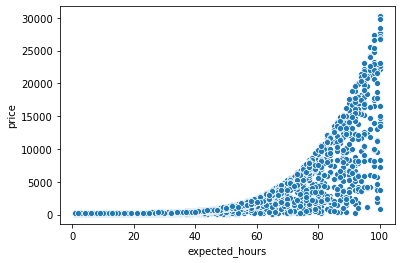

In [17]:
sns.scatterplot(data=df, x='expected_hours', y='price')

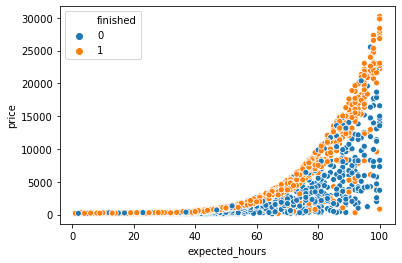

In [18]:
sns.scatterplot(data=df, x='expected_hours', y='price', hue='finished')

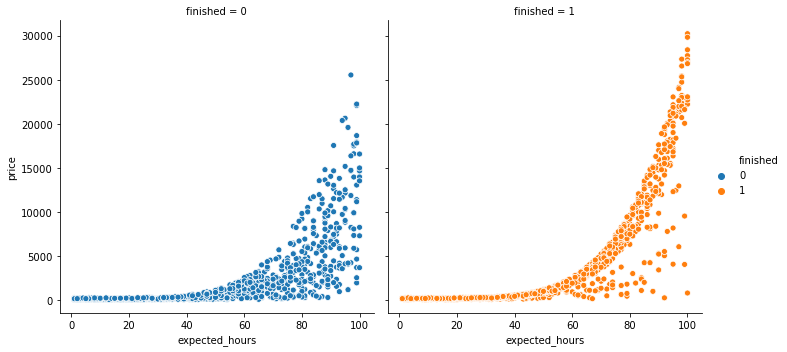

In [21]:
sns.relplot(data=df, x='expected_hours', y='price', hue='finished', col='finished')

In [24]:
x = df[['expected_hours', 'price']] #features
y = df['finished'] #label

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

# model = LinearSVC()
model = SVC()
model.fit(train_x, train_y)
predicts = model.predict(test_x)

accuracy = accuracy_score(test_y, predicts)
accuracy

0.5314814814814814

In [26]:
#baseline
#train_y.shape
test_y.shape

(540,)

In [27]:
baseline = pd.np.ones(540) # se chutar que os 540 testes serão sempre 1, qual o accuracy?

<ipython-input-27-918b20d078d5>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  baseline = pd.np.ones(540) # se chutar que os 540 testes serão sempre 1, qual o accuracy?


In [28]:
accuracy_score(test_y, baseline)

0.5259259259259259

In [30]:
df['price'].min()
df['price'].max()

30223

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state=20, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy = accuracy_score(test_y, predicts)
print("accuracy:{}".format(accuracy*100))

accuracy:70.37037037037037


In [51]:
data_x_hours = train_x[:,0]
data_y_price = train_x[:,1]

In [52]:
print(data_x_hours.min(), x['expected_hours'].min())
print(data_x_hours.max(), x['expected_hours'].max())

-1.7268515859610238 1
1.7388670645003195 100


In [69]:
print(data_y_price.min(), x['price'].min())
print(data_y_price.max(), x['price'].max())

-0.5976598441115906 100
5.377557432910023 30223


In [78]:
x_min = data_x_hours.min()
x_max = data_x_hours.max()
y_min = data_y_price.min()
y_max = data_y_price.max()
print(x_min, x_max, y_min, y_max)

-1.7268515859610238 1.7388670645003195 -0.5976598441115906 5.377557432910023


In [105]:
# pd.np.arange(1,10, 0.5)
eixo_x_hours = pd.np.arange(x_min, x_max, (x_max - x_min)/100)
eixo_x_hours

<ipython-input-105-df31984722b5>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  eixo_x_hours = pd.np.arange(x_min, x_max, (x_max - x_min)/100)


array([-1.72685159, -1.6921944 , -1.65753721, -1.62288003, -1.58822284,
       -1.55356565, -1.51890847, -1.48425128, -1.44959409, -1.41493691,
       -1.38027972, -1.34562253, -1.31096535, -1.27630816, -1.24165097,
       -1.20699379, -1.1723366 , -1.13767942, -1.10302223, -1.06836504,
       -1.03370786, -0.99905067, -0.96439348, -0.9297363 , -0.89507911,
       -0.86042192, -0.82576474, -0.79110755, -0.75645036, -0.72179318,
       -0.68713599, -0.6524788 , -0.61782162, -0.58316443, -0.54850724,
       -0.51385006, -0.47919287, -0.44453569, -0.4098785 , -0.37522131,
       -0.34056413, -0.30590694, -0.27124975, -0.23659257, -0.20193538,
       -0.16727819, -0.13262101, -0.09796382, -0.06330663, -0.02864945,
        0.00600774,  0.04066493,  0.07532211,  0.1099793 ,  0.14463649,
        0.17929367,  0.21395086,  0.24860804,  0.28326523,  0.31792242,
        0.3525796 ,  0.38723679,  0.42189398,  0.45655116,  0.49120835,
        0.52586554,  0.56052272,  0.59517991,  0.6298371 ,  0.66

In [106]:
eixo_y_price = pd.np.arange(y_min, y_max, (y_max - y_min)/100)
eixo_y_price

<ipython-input-106-5fa755f8f47f>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  eixo_y_price = pd.np.arange(y_min, y_max, (y_max - y_min)/100)


array([-5.97659844e-01, -5.37907671e-01, -4.78155499e-01, -4.18403326e-01,
       -3.58651153e-01, -2.98898980e-01, -2.39146807e-01, -1.79394635e-01,
       -1.19642462e-01, -5.98902892e-02, -1.38116409e-04,  5.96140564e-02,
        1.19366229e-01,  1.79118402e-01,  2.38870575e-01,  2.98622747e-01,
        3.58374920e-01,  4.18127093e-01,  4.77879266e-01,  5.37631439e-01,
        5.97383611e-01,  6.57135784e-01,  7.16887957e-01,  7.76640130e-01,
        8.36392302e-01,  8.96144475e-01,  9.55896648e-01,  1.01564882e+00,
        1.07540099e+00,  1.13515317e+00,  1.19490534e+00,  1.25465751e+00,
        1.31440968e+00,  1.37416186e+00,  1.43391403e+00,  1.49366620e+00,
        1.55341838e+00,  1.61317055e+00,  1.67292272e+00,  1.73267489e+00,
        1.79242707e+00,  1.85217924e+00,  1.91193141e+00,  1.97168359e+00,
        2.03143576e+00,  2.09118793e+00,  2.15094010e+00,  2.21069228e+00,
        2.27044445e+00,  2.33019662e+00,  2.38994879e+00,  2.44970097e+00,
        2.50945314e+00,  

In [107]:
train_x[:,0]

array([ 1.00371462, -1.2017427 , -0.18653219, ...,  0.93370011,
       -0.46659026,  0.93370011])

In [108]:
train_x[:,1]

array([-0.51176969, -0.58099755, -0.51494346, ...,  0.57881706,
       -0.56671559,  0.89282193])

In [109]:
#train_x =[[1,2],[3,4], [5,6]]
#train_x[:,0]=> [1,3,5]
#train_x[:,1]=> [2,4,6]


In [110]:
train_x.max()

5.377557432910023

In [111]:
xx, yy = pd.np.meshgrid(eixo_x_hours, eixo_y_price)

<ipython-input-111-04d54e140c6c>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  xx, yy = pd.np.meshgrid(eixo_x_hours, eixo_y_price)


In [112]:
xx.shape

(100, 100)

In [113]:
pontos = pd.np.c_[xx.ravel(), yy.ravel()] #responsavel 
pontos

<ipython-input-113-1b4ec640ce68>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pontos = pd.np.c_[xx.ravel(), yy.ravel()] #responsavel


array([[-1.72685159, -0.59765984],
       [-1.6921944 , -0.59765984],
       [-1.65753721, -0.59765984],
       ...,
       [ 1.6348955 ,  5.31780526],
       [ 1.66955269,  5.31780526],
       [ 1.70420988,  5.31780526]])

In [114]:
z = model.predict(pontos)

In [115]:
z1 = z.reshape(xx.shape) # construir/alterar a forma do vetor para conseguirmos fazer a "plotagem"

z1 = z.reshape(xx.shape)

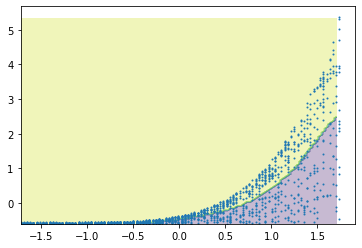

In [116]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z1, alpha=0.3)
plt.scatter(data_x_hours, data_y_price, s=1)

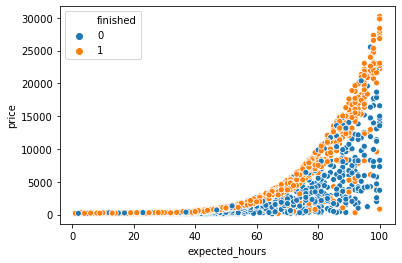

In [117]:
sns.scatterplot(data=df, x='expected_hours', y='price', hue='finished')

In [94]:
z[:100]

array([0, 0, 1, 1], dtype=int64)